In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
a_train = pd.read_csv('https://chananchida-srithongdee.github.io/data/A-train.csv')
a_test = pd.read_csv('https://chananchida-srithongdee.github.io/data/A-test.csv')


In [231]:
a_train = a_train.fillna(a_train.mean())
# a_train = a_train.dropna()
a_test = a_test.fillna(a_test.mean())
# a_test = a_test.dropna()

In [232]:
def drop_outlier(x):
    return x[(x < x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25))) & (x > x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)))]
def cap_outlier(x):
    return x.clip(x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)), x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25)))
a_train = a_train.apply(drop_outlier)
a_train.fillna(a_train.mean(), inplace=True)
# a_train = a_train.apply(cap_outlier)

In [233]:
X_a = a_train[["x3","x8"]]
y_a = a_train["y"]
X_test_a = a_test.iloc[:,[2,7]]
# X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.3, random_state=101)

In [234]:
model_a = LinearRegression()
model_a.fit(X_a,y_a)

LinearRegression()

In [235]:
y_pred_a = model_a.predict(X_test_a)
y_pred_a

array([  2.01935281,   2.97489337,   1.81822051,  -2.10123878,
         6.99594587,  -1.54827207,  13.40847472, -13.52447951,
         3.0148145 ,   8.00413355])

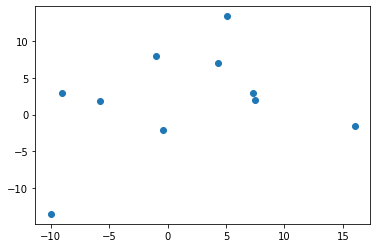

In [236]:
plt.scatter(y_a.iloc[0:10],y_pred_a)

In [237]:
model_a.score(X_a,y_a)

0.5412308351264277